<span style="font-size: 37px;"><strong>Space Debris Detection Using YoloV5n (nano)</strong></span>

<span style="font-size: 17px;"><strong>To install torch - get pip from PYTORCH - https://pytorch.org/</strong></span>

In [72]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126 # i have GPU so I'm using CUDA version "CPU Version also available"

Looking in indexes: https://download.pytorch.org/whl/cu126


# Colne the YOLOV5 repository in our local machine

In [75]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [77]:
!cd yolov5 && pip install -r requirements.txt

<span style="font-size: 15px;"><strong>To verify if PyTorch can leverage GPU acceleration, if True CUDA is available, not available gives False</strong></span>

In [81]:
!python -c "import torch; print(torch.cuda.is_available())"

True


# To check if the model is correctly detecting objects

In [50]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

<span style="font-size: 15px;"><strong>A Suggested Model YOLOV5n(nano) </strong></span>

In [53]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')

Using cache found in C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-26 Python-3.12.7 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [55]:
model.conf = 0.1

In [57]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1))
  

In [99]:
img = r"C:\Users\Gowth\Downloads\tom.jpg"

In [101]:
results = model(img)
results.print()

C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1500x2249 6 persons, 1 car
Speed: 95.9ms pre-process, 70.6ms inference, 31.7ms NMS per image at shape (1, 3, 448, 640)


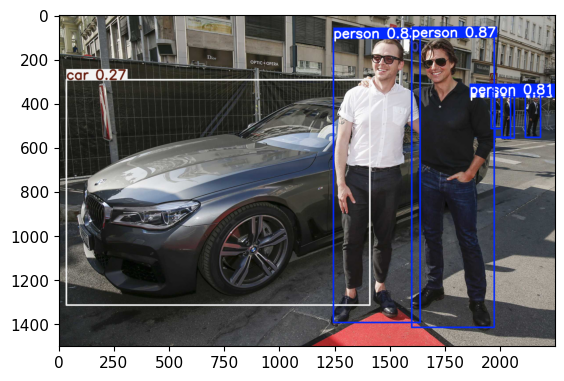

In [103]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [105]:
results.render()

[array([[[157, 153, 128],
         [157, 153, 128],
         [158, 153, 131],
         ...,
         [163, 162, 157],
         [164, 161, 154],
         [152, 149, 140]],
 
        [[152, 148, 123],
         [152, 148, 123],
         [152, 148, 123],
         ...,
         [162, 161, 156],
         [163, 160, 153],
         [152, 149, 140]],
 
        [[173, 169, 144],
         [172, 168, 143],
         [169, 165, 140],
         ...,
         [161, 160, 155],
         [161, 158, 151],
         [149, 146, 137]],
 
        ...,
 
        [[ 38,  38,  38],
         [ 38,  38,  38],
         [ 38,  38,  38],
         ...,
         [ 89,  82,  76],
         [135, 128, 122],
         [168, 161, 155]],
 
        [[ 38,  38,  38],
         [ 38,  38,  38],
         [ 38,  38,  38],
         ...,
         [121, 114, 108],
         [153, 146, 140],
         [164, 157, 151]],
 
        [[ 38,  38,  38],
         [ 38,  38,  38],
         [ 38,  38,  38],
         ...,
         [162, 155, 149],
  

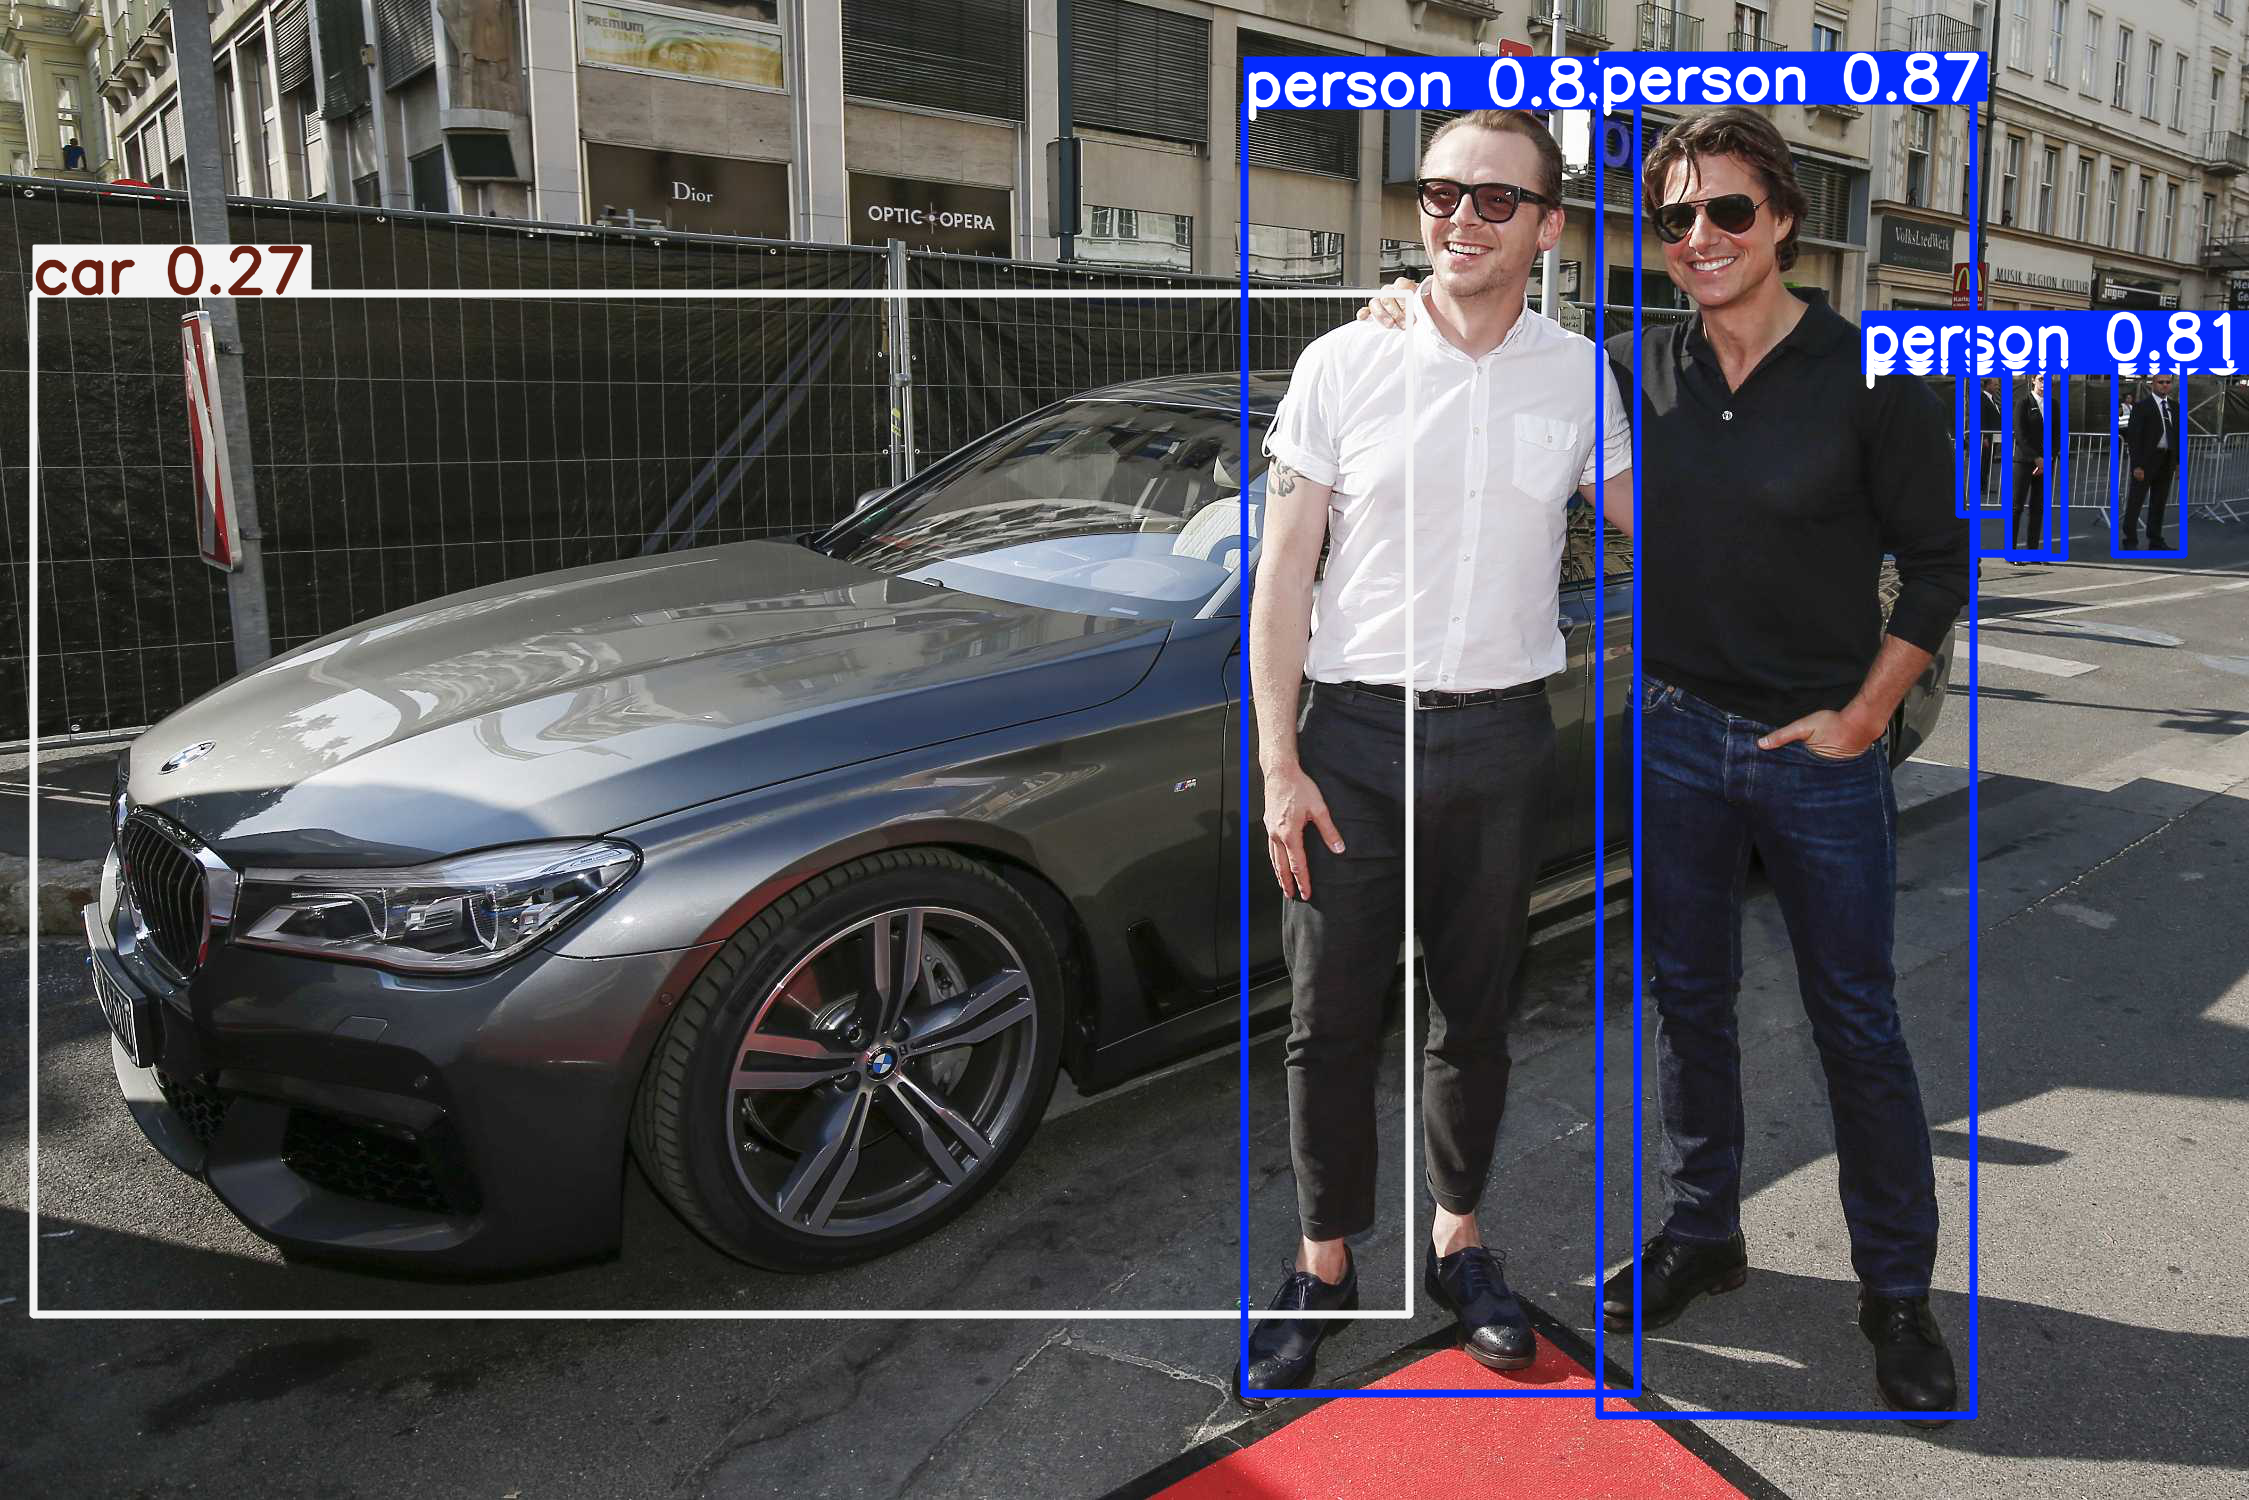

In [107]:
results.show()

HENCE THE MODEL WAS WORKING PROPERLY

# To select n-number (a multiple) images and renames it as specified configuration

In [ ]:
import os
import uuid
from PIL import Image
import time
import cv2
from tkinter import Tk, Button, Label, filedialog

In [2]:
import os
import cv2
import uuid
from tkinter import Tk, Label, Button, filedialog

labels = ['Satellite', 'Derelict', 'Upper Stage', 'Aeroshell', 'Debris']
output_folder = r"C:\Users\Gowth\Downloads\jk"

class ImageClassifier:
    def __init__(self):
        self.root = Tk()
        self.root.title("Image Classifier")
        
        # Create output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)
        
        # GUI Elements
        self.label = Label(self.root, text="Select images to classify", font=('Arial', 14))
        self.label.pack(pady=20)
        
        # Satellite Button (Green)
        self.satellite_btn = Button(
            self.root, text="Satellite", command=lambda: self.classify_image(0),
            bg='green', fg='black', font=('Arial', 12), width=15
        )
        self.satellite_btn.pack(pady=5)

        #buttons with colors
        self.derelict_btn = Button(
            self.root, text="Derelict", command=lambda: self.classify_image(1),
            bg='Orange', fg='black', font=('Arial', 12), width=15
        )
        self.derelict_btn.pack(pady=5)
        
        self.upper_btn = Button(
            self.root, text="Upper Stage", command=lambda: self.classify_image(2),
            bg='blue', fg='white', font=('Arial', 12), width=15
        )
        self.upper_btn.pack(pady=5)
        
        self.aeroshell_btn = Button(
            self.root, text="Aeroshell", command=lambda: self.classify_image(3),
            bg='purple', fg='white', font=('Arial', 12), width=15
        )
        self.aeroshell_btn.pack(pady=5)
        
        self.debris_btn = Button(
            self.root, text="Debris", command=lambda: self.classify_image(4),
            bg='red', fg='black', font=('Arial', 12), width=15
        )
        self.debris_btn.pack(pady=5)
        
        # Select Images Button
        self.next_btn = Button(
            self.root, text="Select Images", command=self.select_images,
            font=('Arial', 12), width=15
        )
        self.next_btn.pack(pady=20)
        
        # Initialize variables
        self.current_image = None
        self.image_paths = []
        self.current_index = 0
        
    def select_images(self):
        self.image_paths = filedialog.askopenfilenames(
            title="Select Images",
            filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.tiff")]
        )
        
        if self.image_paths:
            self.current_index = 0
            self.load_current_image()
    
    def load_current_image(self):
        if self.current_index < len(self.image_paths):
            self.image_path = self.image_paths[self.current_index]
            self.current_image = cv2.imread(self.image_path)
            self.show_image()
            self.label.config(text=f"Image {self.current_index + 1} of {len(self.image_paths)}: {os.path.basename(self.image_path)}")
        else:
            self.label.config(text="All images processed. Select more images.")
            self.current_image = None
            cv2.destroyAllWindows()
        
    def show_image(self):
        if self.current_image is not None:
            cv2.destroyAllWindows()
            cv2.imshow("Current Image", self.current_image)
            cv2.waitKey(1)
    
    def classify_image(self, label_idx):
        if self.current_index < len(self.image_paths):
            new_filename = f"{labels[label_idx]}_{uuid.uuid4().hex}.jpg"
            output_path = os.path.join(output_folder, new_filename)
            cv2.imwrite(output_path, self.current_image)
            self.current_index += 1
            self.load_current_image()
    
    def run(self):
        self.root.mainloop()

if __name__ == "__main__":
    app = ImageClassifier()
    app.run()

# Install labelImg

In [17]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [19]:
!pip install pyqt5 lxml --upgrade

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.9 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.9 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 1.8/6.9 MB 3.1 MB/s eta 0:00:02
   ------------- -------------------------- 2.4/6.9 MB 3.1 MB/s eta 0:00:02
   ------------------- -------------------- 3.4/6.9 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 4.5/6.9 MB 3.8 MB/s eta 0:00:01
   ----------------------------------- ---- 6.0/6.9 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------- ----------------------- 1.6/3.8 MB 8.4 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 8.1 MB/s eta 0:00:00
   ------------------------------

In [27]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [94]:
!pip install PyYAML matplotlib opencv-python

# To check

<span style="font-size: 15px;"><strong>The label.txt and it's corresponding images are ok and check the yaml file ok aren't </strong></span>

In [2]:
import os
from PIL import Image

img_dir = "data/images"
label_dir = "data/labels"

img_files = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')]

print(f"Total images: {len(img_files)}")
print(f"Total labels: {len(label_files)}")

missing_labels = 0
empty_labels = 0

for img_file in img_files:
    label_file = img_file.rsplit('.', 1)[0] + '.txt'  # Handles .jpg/.png/.jpeg
    label_path = os.path.join(label_dir, label_file)
    
    if not os.path.exists(label_path):
        print(f" Missing label: {label_file}")
        missing_labels += 1
    else:
        with open(label_path, 'r') as f:
            labels = f.read().strip()
            if not labels:
                print(f" Empty label: {label_file}")
                empty_labels += 1

print(f"\nSummary:")
print(f"- Missing labels: {missing_labels}")
print(f"- Empty labels: {empty_labels}")
if missing_labels == 0 and empty_labels == 0:
    print("All labels are valid!")

Total images: 100
Total labels: 101

Summary:
- Missing labels: 0
- Empty labels: 0
All labels are valid!


In [96]:
import yaml
from pathlib import Path

# Load YAML file
yaml_path = r"C:\Users\Gowth\yolov5\dataset.yaml"
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Print YAML details
print("YAML File Contents:")
print(f"Base Path: {data['path']}")
print(f"Train Images: {data['train']}")
print(f"Validation Images: {data['val']}")
print(f"Number of Classes: {data['nc']}")
print("\nClass Names:")
for idx, name in enumerate(data['names']):
    print(f"{idx}: {name}")

YAML File Contents:
Base Path: ../data
Train Images: ../data/images
Validation Images: ../data/images
Number of Classes: 20

Class Names:
0: dog
1: person
2: cat
3: tv
4: car
5: meatballs
6: marinara sauce
7: tomato soup
8: chicken noodle soup
9: french onion soup
10: chicken breast
11: ribs
12: pulled pork
13: hamburger
14: cavity
15: Aeroshell
16: Debris
17: Derelict
18: Satellite
19: Upper Stage


# Training the yolo model

In [123]:
!cd yolov5 && python train.py --img 640 --batch 8 --epochs 100 --data dataset.yaml --weights yolov5n.pt --workers 2 --cache ram/disk

train: weights=yolov5n.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram/disk, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-405-g61c22e2d Python-3.12.7 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, 

# Load The Model

In [2]:
import torch

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=r'C:\Users\Gowth\yolov5\runs\train\exp\weights\best.pt')

#Lower confidence threshold (default=0.25)
model.conf = 0.1

Using cache found in C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-3-26 Python-3.12.7 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 1786225 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


In [6]:
model.iou = 0.45  # Merge overlapping detections more strictly

# Visualizing Space Debris through images

<span style="font-size: 17px;"><strong>DEBRIS</strong></span>

In [9]:
results = model(r"data\images\Debris_6262f66548d648c2a56339aff393e6ad.jpg")

C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [11]:
results.print()

image 1/1: 640x640 1 Debris
Speed: 100.9ms pre-process, 153.2ms inference, 438.4ms NMS per image at shape (1, 3, 640, 640)


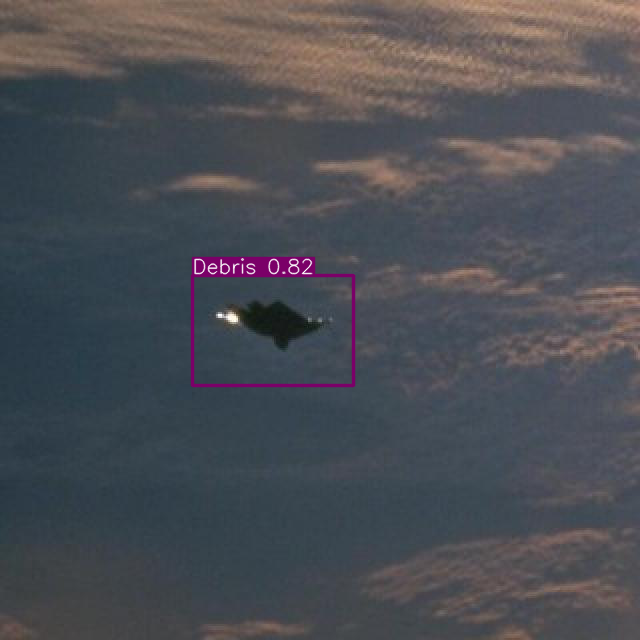

In [13]:
results.show()

In [15]:
results = model(r"data\images\Debris_81e380c2ebc24190b6afe87d02f857bb.jpg")

C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [17]:
results.print()

image 1/1: 640x640 1 Debris
Speed: 27.5ms pre-process, 28.1ms inference, 88.6ms NMS per image at shape (1, 3, 640, 640)


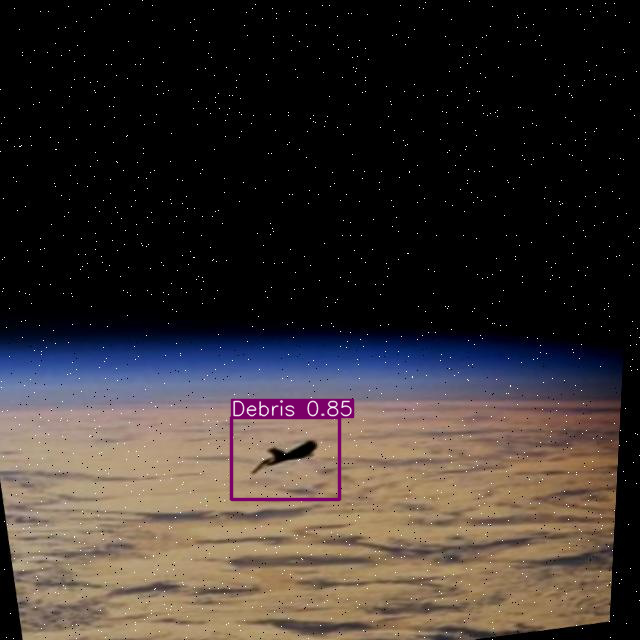

In [19]:
results.show()

<span style="font-size: 17px;"><strong>SATELLITE</strong></span>

In [21]:
results = model(r"data\images\Satellite_bb6721f681a6485c9aa2abedf3d14f26.jpg")

C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [23]:
results.print()

image 1/1: 538x1080 3 Satellites
Speed: 38.7ms pre-process, 116.5ms inference, 7.3ms NMS per image at shape (1, 3, 320, 640)


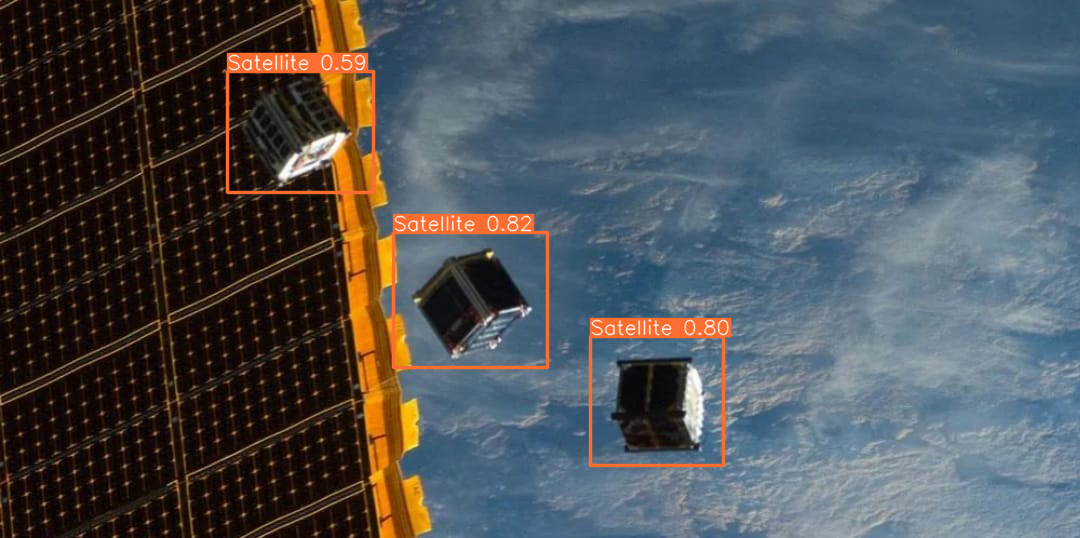

In [25]:
results.show()

<span style="font-size: 17px;"><strong>DERELICT</strong></span>

In [29]:
deli = r"data\images\Derelict_87f308d8bc8b47f6802cfe6f9bfef45b.jpg"

In [31]:
results = model(deli)

C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [33]:
results.print()

image 1/1: 640x640 1 Derelict
Speed: 34.9ms pre-process, 27.0ms inference, 74.6ms NMS per image at shape (1, 3, 640, 640)


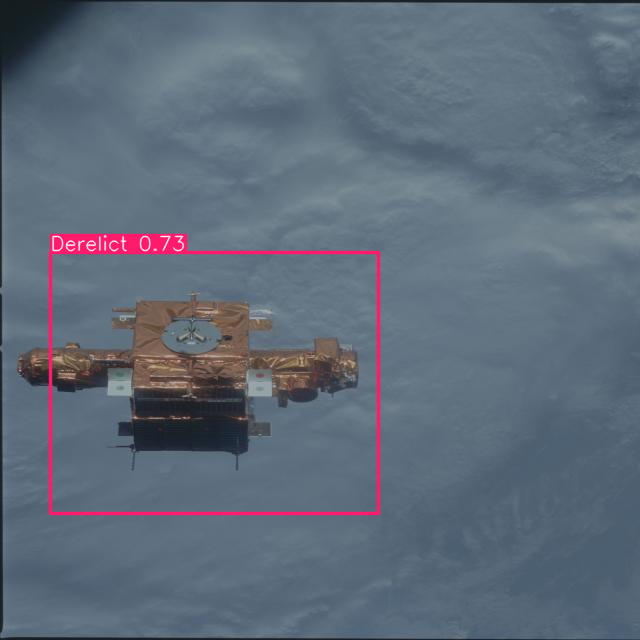

In [35]:
results.show()

<span style="font-size: 17px;"><strong>UPPER STAGE</strong></span>

In [39]:
results = model(r"C:\Users\Gowth\data\images\Upper Stage_be0a71074555411497b326fefd0a9737.jpg")

C:\Users\Gowth/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [41]:
results.print()

image 1/1: 576x1024 1 Upper Stage
Speed: 23.4ms pre-process, 104.3ms inference, 7.1ms NMS per image at shape (1, 3, 384, 640)


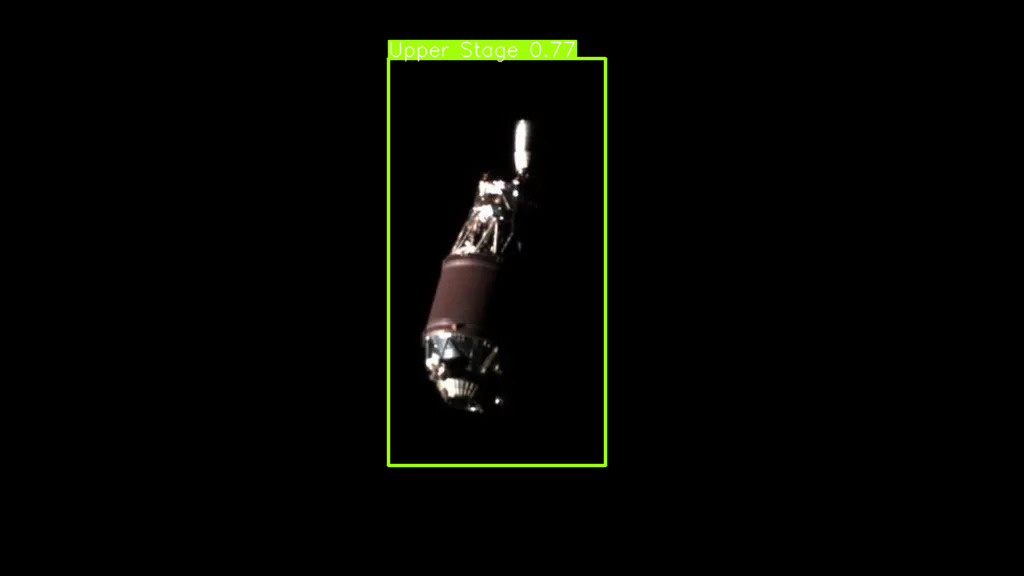

In [43]:
results.show()

# Visualizing Space Debris through Video

In [17]:
import cv2
import numpy as np

In [ ]:
cap=cv2.VideoCapture(r"C:\Users\Gowth\data\debris.mp4")
while cap.isOpened():
    ret,frame=cap.read()
    if not ret:break
    results=model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    if cv2.waitKey(10)&0xFF==ord('q'):break
cap.release()
cv2.destroyAllWindows()

# A Dashboard 

<span style="font-size: 20px;"><strong>A python file was already created, named as "stem.py" and saved. To open the Dashboard for the Detection purpose to show detection events and detection logs as a Real-time Alerts </strong></span>

Run the Python file as:

In [ ]:
!streamlit run stem.py